In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Study Independent/Computer Vision/Tugas Lab Klasifikasi"

/content/drive/MyDrive/Study Independent/Computer Vision/Tugas Lab Klasifikasi


In [4]:
import os
import os.path
import numpy as np
import matplotlib.pyplot as plt
X = []    
import cv2

#menentukan direktori/folder data citra yang akan dibuka
dirname = 'Batik/Train'  

#menentukan ukuran tinggi dan lebar gambar
height = 200
width = 200
dim = (width, height)

#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan= [] 
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))
        if img_path.endswith("jpg"):
            img = cv2.imread(img_path) #baca path data
            
            #preprocessing data / segentasi  boleh dilakukan
            convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            resized=cv2.resize(convert,dim, interpolation=cv2.INTER_LINEAR)
            blur = cv2.GaussianBlur(resized,(5,5),0)            
            tampungan.append(blur.flatten())
#             print(blur.shape)
X = np.array(tampungan) 
#mengetahui ukuran dari np

#labeling
y0 = np.zeros(518)
y1 = np.ones(516)
y2 = np.full((520), 2)
y = []
y = np.concatenate((y0,y1,y2), axis=0)
print(X.shape)

Batik/Train
Batik/Train/Megamendung
Batik/Train/Nitik
Batik/Train/Parang
(1554, 120000)


In [5]:
import os

onlyfiles = next(os.walk('Batik/Train/Parang'))[2] #dir is your directory path as string
print (len(onlyfiles))

520


In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, stratify=y) #train size adalah persentase data test yang di-split

from builtins import range
from builtins import object
num_training = X_train.shape[0] #deklarasi untuk data training diambil dari X_train
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0] #deklarasi untuk data diambil dari Y_train
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Mengubah data citra menjadi baris
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (1243, 120000)
X_test: (311, 120000)
y_train: (1243,)
y_test: (311,)


In [7]:
from sklearn import svm
from sklearn.model_selection import cross_validate, cross_val_score


# membangun model SVM
model = svm.SVC(C=1.0, kernel="linear" ,decision_function_shape='ovr', probability=True)
score = cross_validate(model, X_train, y_train, scoring='accuracy',
                         cv=5, return_train_score=True)
print(score['test_acc'].mean())

In [8]:
from sklearn.metrics import classification_report

# melakukan uji data
model.fit(X_train, y_train )
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

#macro avg membandingkan hasil dengan jumlah dataset yang ada
#micro avg membandingkan hasil dengan jumlah data tiap kelas

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       104
         1.0       1.00      0.98      0.99       103
         2.0       0.96      0.99      0.98       104

    accuracy                           0.98       311
   macro avg       0.98      0.98      0.98       311
weighted avg       0.98      0.98      0.98       311



In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['linear','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [10]:
from sklearn import svm

model = svm.SVC(C=1.0, kernel="linear" ,decision_function_shape='ovr', probability=True)

Enter URL of Image :Batik/Train/Megamendung/dr_8_3670.jpg


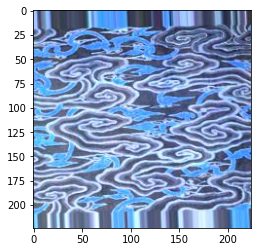

[[1.66666686e-14 9.99999900e-01 1.00000020e-07]]
Megamendung = 1.6666668602337885e-12%
Nitik = 99.99998999999636%
Parang = 1.0000001994735343e-05%
The predicted image is : [1.]


In [11]:
import matplotlib.pyplot as plt
url=input('Enter URL of Image :')
img=cv2.imread(url)
plt.imshow(img)
plt.show()
from skimage.transform import resize

#Hasil Uji Klasifikasi pada dataset
Categories = ['Megamendung','Nitik','Parang']

img_resize=resize(img,(200,200,3))
l=[img_resize.flatten()]
model.fit(X,y)


# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict_proba(l)
print(probability)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+str(model.predict(l)))

In [ ]:
Batik/Train/Megamendung/dr_8_3670.jpg